# Spectral Sampling Demonstration

In [1]:
from summit.utils.models import GPyModel
import matplotlib.pyplot as plt
import numpy as np

In [21]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05
m = GPyModel(input_dim=1)
m.fit(X, Y)
sampled_f = m.spectral_sample(X, Y)

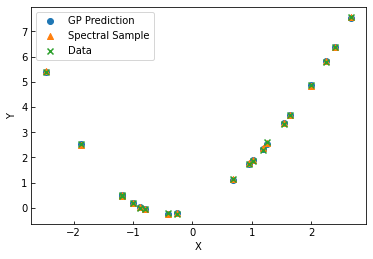

In [22]:
predict_Y = m.predict(X)
sample_Y = sampled_f(X)
fig, ax = plt.subplots(1)
ax.scatter(X[:,0], predict_Y[:, 0], marker= 'o', label='GP Prediction')
ax.scatter(X[:,0], sample_Y, marker='^', label= 'Spectral Sample')
ax.scatter(X[:,0], Y[:, 0], marker='x', label='Data')
ax.legend()
ax.tick_params(direction='in')
ax.set_xlabel('X')
_ = ax.set_ylabel('Y')

In [23]:
mae_pred = np.mean(np.abs(predict_Y[:,0]-Y[:,0]))
mae_sample = np.mean(np.abs(sample_Y-Y[:,0]))
print("MAE GP: ", mae_pred)
print("MAE Spectral Sample: ", mae_sample)

MAE GP:  0.025617426715247804
MAE Spectral Sample:  0.02695126283895154
